In [ ]:
pip install dtreeplt

     |████████████████████████████████| 792 kB 4.2 MB/s 
     |████████████████████████████████| 374 kB 62.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.0 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
#to create tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#to split and train the data
from sklearn.model_selection import train_test_split

In [ ]:
from dtreeplt import dtreeplt#tree plot

In [ ]:
from sklearn import metrics#To evaluation

In [ ]:
pima = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/diabetes.csv")

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = pima.iloc[:,range(0,8)]#[x,y]x=rows,y=columns

In [ ]:
y = pima.Outcome

In [ ]:
#randomstate is to allow for reproduce the same results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#create decision tree classifier object, entropy = measure of impurities
clf = DecisionTreeClassifier(criterion="entropy")#asking python to create this tree & import decision tree classifier algorithm

In [ ]:
#putting data into the model
dtmodel = clf.fit(x_train, y_train)

In [ ]:
y_pred = dtmodel.predict(x_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))#to check how close the test and train model is

Accuracy: 0.7229437229437229


In [ ]:
#draw the tree
dtree = dtreeplt(model = dtmodel, feature_names = x_train.columns.values, target_names = ['0','1'])

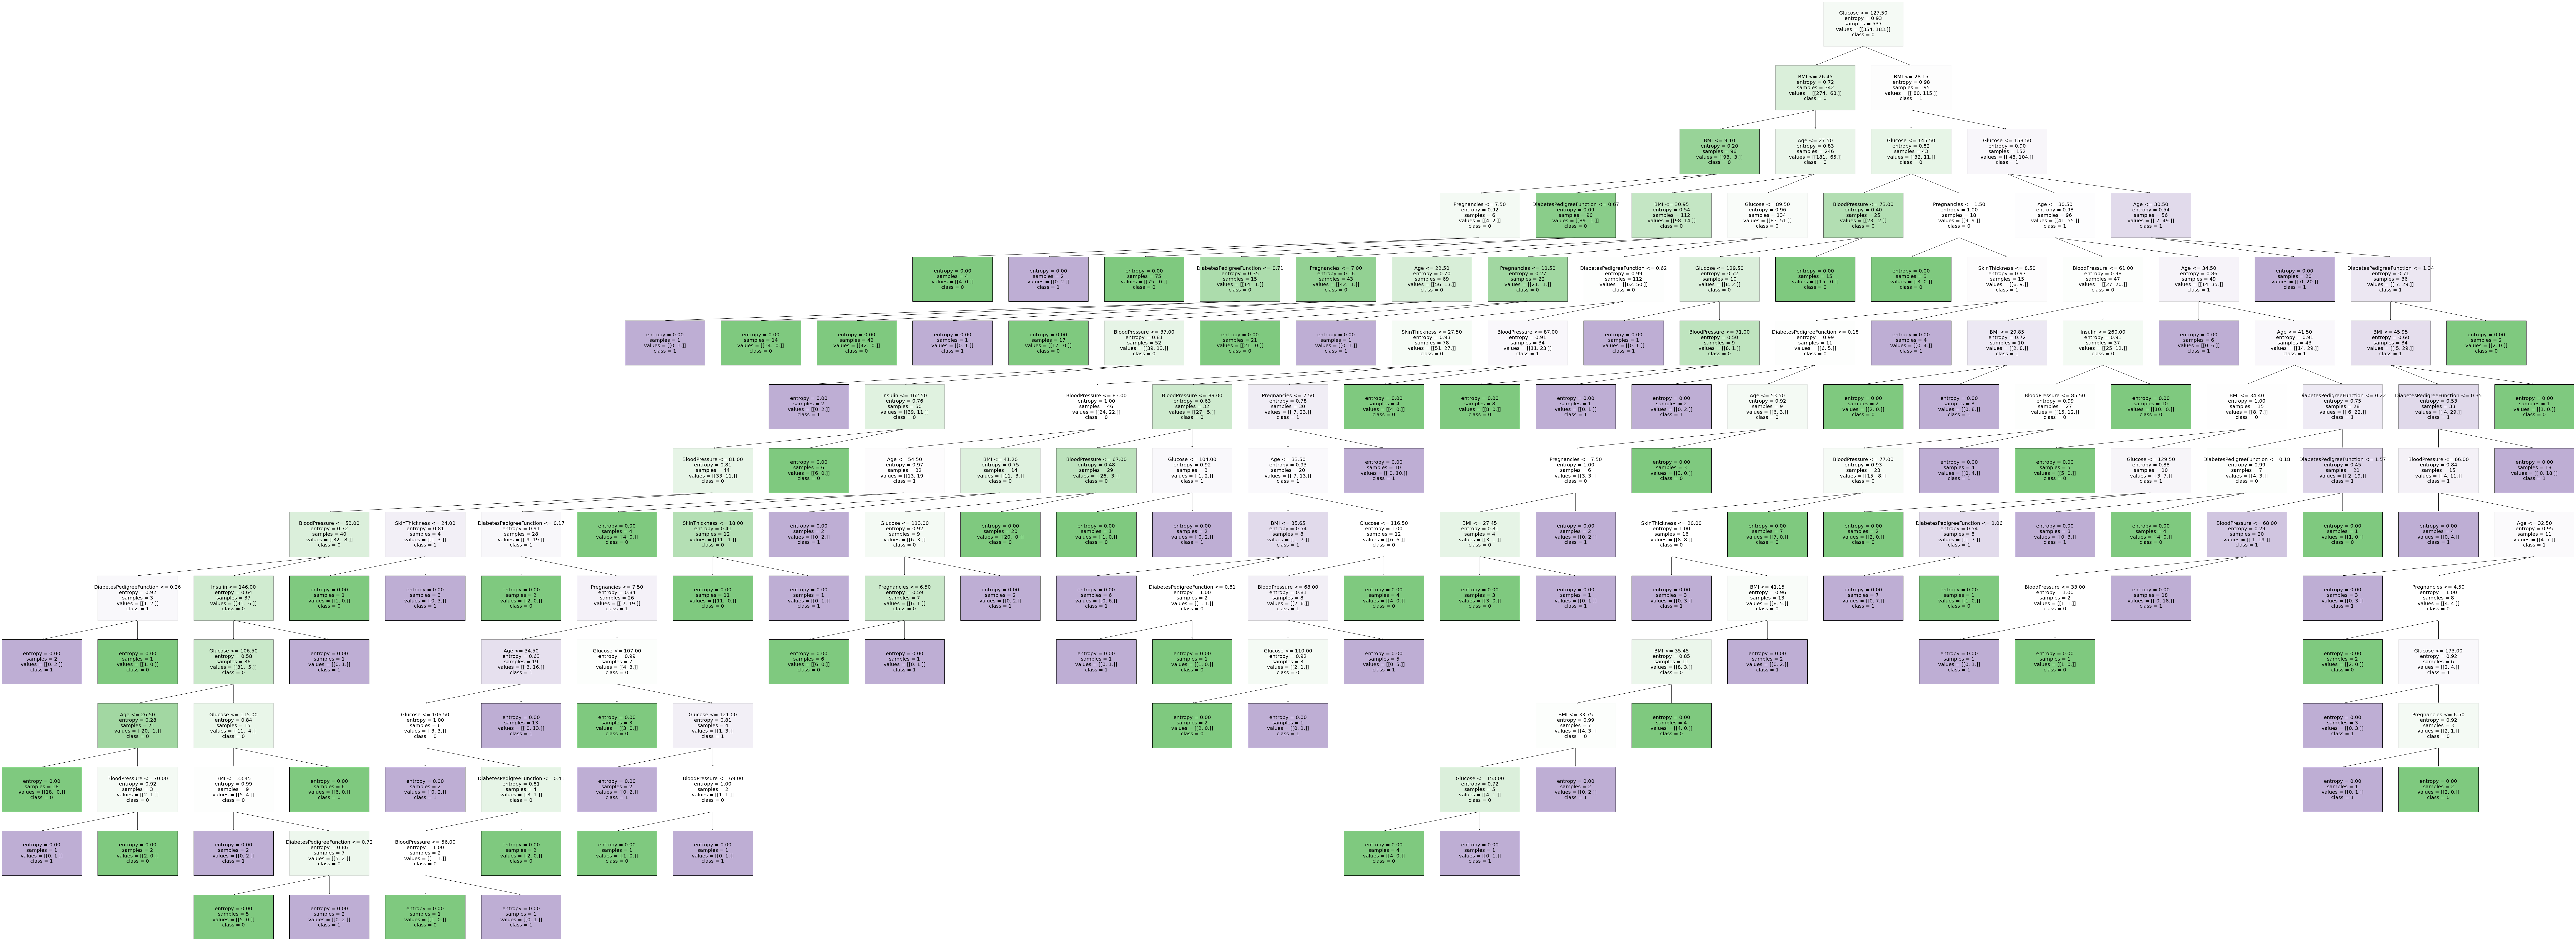

In [ ]:
fig = dtree.view()#1st node is the best predictor of diabeties

In [ ]:
#using diffrent model to check which is better
from sklearn.linear_model import LogisticRegression

In [ ]:
lreg = LogisticRegression()

In [ ]:
lregmodel = lreg.fit(x_train, y_train)

In [ ]:
yreg_pred = lregmodel.predict(x_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, yreg_pred))

Accuracy: 0.7835497835497836


In [ ]:
#logistic regression is a better model as the value is more than decision tree

In [ ]:
lregmodel.coef_

array([[ 0.10143192,  0.03358643, -0.01571099, -0.00134881, -0.00069745,
         0.08943669,  0.56049167,  0.01705755]])

In [ ]:
lregmodel.intercept_

array([-7.86829029])